**Bitwise Operations**

1. AND 
2 inputs

2. OR 
  * 2 inputs

3. NOT 
  * 1 input

Boolean operations are T/F; bitwise are 0/1

0 == False; 1 == True

**Masking**
use gates as conditionals (masking of graphic layers)



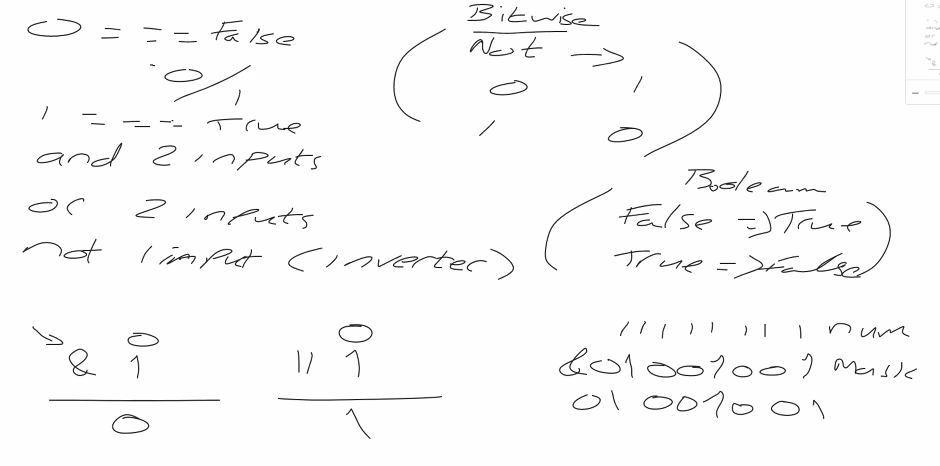

num  --> 0000 0100
mask  -> 0100 0101

&_n_m -> 0000 0100

* one or the other

  * OR  --> |

* both

  * AND --> &

* one the other or both

  * XOR --> ^

* invert, opposite

  * NOT --> ~
  


In [ ]:
# example
num = 0110 1001 1010 1111
and_mask = 1111 0010 1010 1110

result = 0110 0000 1010 1110


**Arithmetic Shift**

[Binary shift](https://www.interviewcake.com/concept/java/bit-shift)

[GCSE - Binary Shift](https://www.bbc.co.uk/bitesize/guides/z6qqmsg/revision/4#:~:text=To%20divide%20a%20number%2C%20a,shift%20three%20places%20to%20the)

Binary numbers are multiplied and divided through a process called shifting. There are two types of binary shift - arithmetic and logical. They work the same way for positive numbers but differently for negative numbers. 

Multiplication
To multiply a number, a binary shift moves all the digits in the binary number along to the left and fills the gaps after the shift with 0:

* to multiply by two, all digits shift one place to the left
* to multiply by four, all digits shift two places to the left
* to multiply by eight, all digits shift three places to the left
and so on

Division
To divide a number, a binary shift moves all the digits in the binary number along to the right and fills the gaps after the shift with 0:

* to divide by two, all digits shift one place to the right
* to divide by four, all digits shift two places to the right
* to divide by eight, all digits shift three places to the right
and so on



In [ ]:
# example 1
  A   B   C   D
1000 0000 0000 1000
1111 0000 0000 0000 &
1000 0000 0000 0000 >> 12
0000 0000 0000 1000

# example 2
  A   B   C   D
1000 0000 0000 1000
0000 1111 0000 0000 &
0000 0100 0000 0000 >> 8
0000 0000 0000 0100

# shift the whole number to the right and pad the left --> multiplication
# shift the whole number to the left and pad the right --> division
# destructive shifts --> data is gone because it is overwritten


**Using Masking to Extract Opcodes**

In [ ]:
# example 1
AABCDDDD

AA --> will take in 1 operand
00
01
10
# 11 (specs/constraints of 8-bit CPU eliminate this option)

# four different variables encoded into opcode
AABCDDDD
1000 0010 LDI
1100 0000 &
1000 0000 >> 6 # shift to right by 6 and pad to the left
opsize = 0000 0010 => 2 # we need to make sure to consider the number of variables 

#  opsize = ((command & opcode) shift by 6) add 1
opsize = ((cmd & 0b11000000) >> 6) + 1
if cmd == LDI:
  "do stuff"

elif cmd == BOB:
  "do other stuff"

# program counter
pc += opsize


Where to use in our project:

**Flags**
8 possible variables
requires shifting and masking

**Instruction Layout**
extract how many it needs to move at a time using masking by 6 using opcodes


ls8.py

In [ ]:
# in CPU opcodes
LOAD_NUM = 0b00000000  #0 
PRINT_NUM = 0b00000001  #1
PRINT_NAME = 0b00000010 #2
PRINT_REG = 0b00000010  #3
HALT = 0b00000100      #4
ADD = 0b00000101       #5


# in CPU memory
#ram = [0]*255  # limits to 255
ram = [
       PRN_NAME,
       PRN_NAME,
       PRN_NUM,
       123,
       LOAD_NUM,
       100,
       0,
       LOAD_NUM,
       20,
       1,
       ADD,
       PRN_REG,
       0,
       HALT
]

#in CPU program counter
pc = 0

# in CPU registers (r0-r7)
registers = [0]*8 # limits to 8-bit

# set running loop
running = True

# running loop
while self.running:
  # fetch
  inst = self.ram[self.pc]

  # decode instrunction size 
  opcode_size = (inst >> 6) +1
  
  # decode
  if inst == PRN_NAME:
    # execute
    print("Jeannine")
  
  # decode
  elif inst == HALT:
    # execute
    running = False
  
  #decode
  elif inst == LOAD_NUM:
    # execute
    # get number
    num = self.ram[self.pc+1]
    # get register index
    reg_index = self.ram[self.pc+2]
    # put number in register list at index of register 
    registers[reg_index] = num
  
  #decode
  elif inst == PRN_NUM:
    #execute
    print(self.ram[self.pc+1])

 #decode
  elif inst == PRN_REG:
    #execute
    reg_index = self.ram[self.pc+1]
    print(self.reg[reg_index])

  #decode
  elif inst == ADD:
    #execute
    reg_a = self.ram[self.pc+1]
    reg_b = self.ram[self.pc+2]

    self.reg[reg_a] += self.reg[reg_b]
  

  #decode
  else:
    print(f'Unknown Instruction {inst}')
    self.running = False

  # increment program counter as determined by opcode size
  self.pc += opcode_size



Jeannine
Jeannine
123


Refactor example code for assignment:


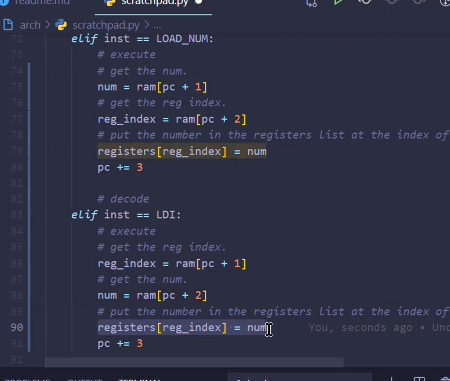

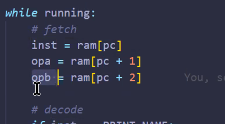

In [3]:
# FILO file load
with open("/content/sample_data/simple.py") as f:
  for line in f:
    print(line)


01101111

01101010

11101101

10101010


In [11]:
LOAD_NUM = 0b00000000  #0 
PRINT_NUM = 0b00000001  #1
PRINT_NAME = 0b00000010 #2
PRINT_REG = 0b00000010  #3
HALT = 0b00000100      #4
ADD = 0b00000101 

import sys

program = []

if len(sys.argv) <2:
  print("usage: <filename>.py <filename>")

else:

  try:
    #loaded_file_name = sys.argv[]
    file_name = sys.argv[1]
#def load_prog(self):
  #try
    # FILO file load
    with open(file_name) as f:
      num_string = int(line.split("#")[0].strip()

      if num_string == " ":
        continue

      for line in f:
        int_of_bin = (num_string, 2)
        
        #print(f'{int_of_bin:08b}: {int_of_bin}')
        #ram.append(int_of_bin)
        program.append(int_of_bin)

      
  except: FileNotFoundError
    print("I cannot find the file!")

  #return program
print(program)

SyntaxError: ignored

**Decode Opcode**

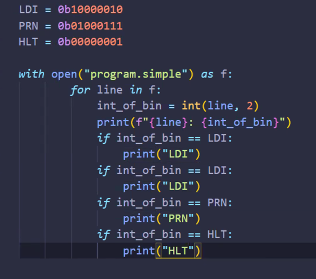

note that it cannot convert with comments in (must split on "#")

reorder